In [51]:
import pandas as pd
import numpy as np

import scipy.stats as stats  #for qq plot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [52]:
df = pd.read_csv('/content/train (1).csv',usecols = ['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [53]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [54]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [55]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [56]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .1,random_state = 42)

<ipython-input-58-47bda80e747a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


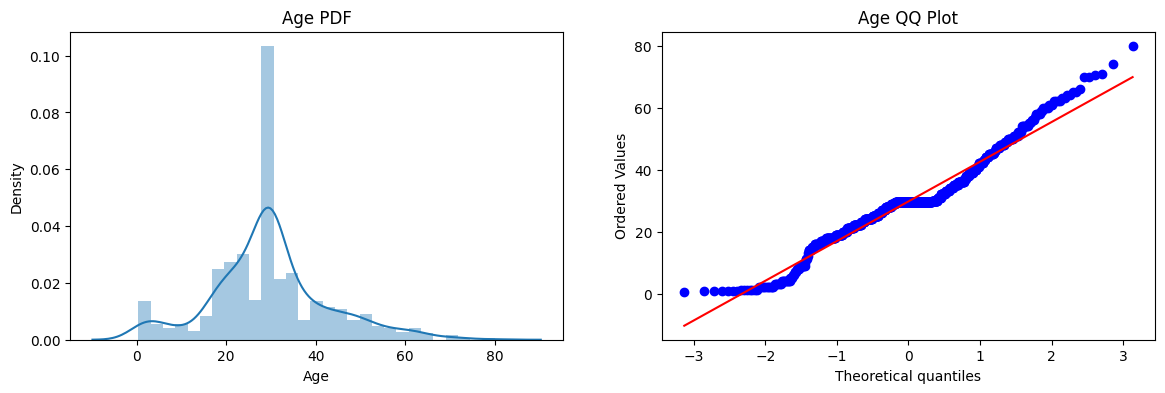

In [58]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist = "norm", plot = plt)
plt.title('Age QQ Plot')
plt.show()

<ipython-input-59-ebab5b1f0506>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


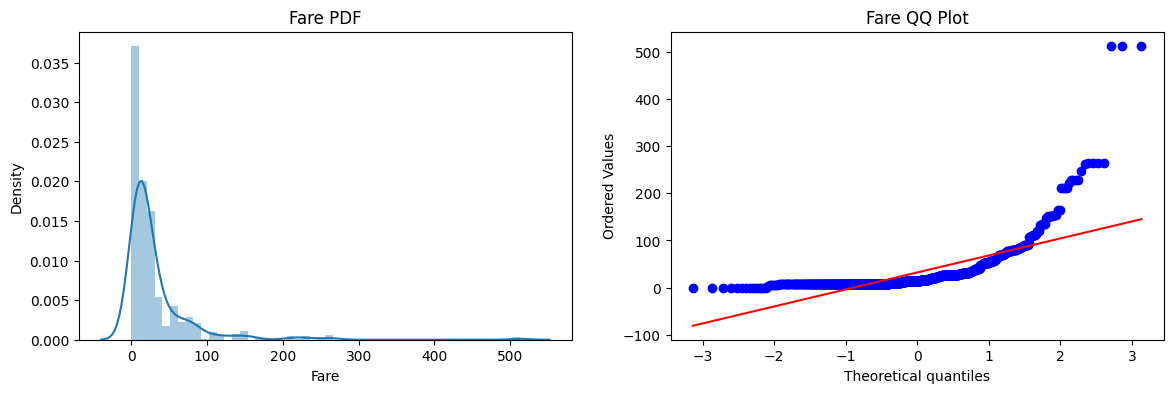

In [59]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist = "norm", plot = plt)
plt.title('Fare QQ Plot')
plt.show()

In [60]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [61]:
clf.fit(x_train,y_train)
clf1.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
yprd = clf.predict(x_test)
yprd1 = clf1.predict(x_test)

In [63]:
print("Accuracy Lr: ",accuracy_score(y_test,yprd))
print("Accuracy Dt: ",accuracy_score(y_test,yprd1))

Accuracy Lr:  0.6666666666666666
Accuracy Dt:  0.6555555555555556


In [64]:
trf = FunctionTransformer(func = np.log1p)

In [65]:
from math import remainder
t2 = ColumnTransformer(transformers = [
    ('log',FunctionTransformer(func = np.log1p),['Fare'])
],remainder = 'passthrough')

In [66]:
x_train_transformed = t2.fit_transform(x_train)
x_test_transformed = t2.transform(x_test)

In [67]:
clf.fit(x_train_transformed,y_train)
clf1.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [68]:
yprd2 = clf.predict(x_test_transformed)
yprd3 = clf1.predict(x_test_transformed)

In [69]:
print("Accuracy Lr: ",accuracy_score(y_test,yprd2))
print("Accuracy Dt: ",accuracy_score(y_test,yprd3))

Accuracy Lr:  0.6888888888888889
Accuracy Dt:  0.6444444444444445


In [71]:
X_transformed2 = t2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6532209737827714


In [72]:

def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()


In [74]:
apply_transform(lambda x: 1/x*x)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 921, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
